In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import sys
import datetime

root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)
    

load_dotenv()

True

In [2]:
# load datasets
from training.utils import date_range, preprocess_c, minmax_descale

df_test = pd.concat([
    pd.read_csv(f'../datasets/d{d.strftime("%Y-%m-%d")}.csv') for d in date_range(
        datetime.date(2020, 2, 15), 
        datetime.date(2020, 3, 1),
        datetime.timedelta(days=1),
    )
])

X1_test, X2_test, y_test = preprocess_c(df_test)

X1_test.shape, X2_test.shape, y_test.shape

((270722, 1, 4), (270722, 30, 4), (270722, 4))

In [3]:

from keras.models import Model, load_model

from training.utils import plot_accuracy

8461/8461 [==============================] - 10s 1ms/step


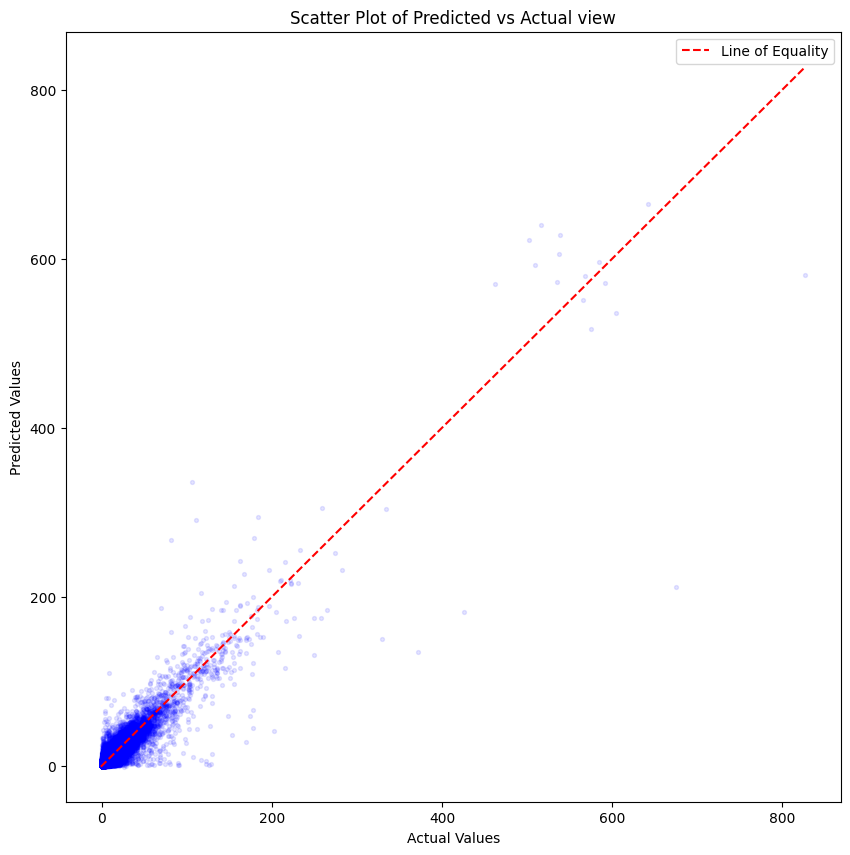

In [4]:
# test predict view
model_view: Model = load_model('../model/c-view.keras')
p_view = model_view.predict([X1_test, X2_test])
p_view = minmax_descale(p_view[:, 0], 'view')
plot_accuracy(p_view, df_test['view'], "view")


8461/8461 [==============================] - 10s 1ms/step


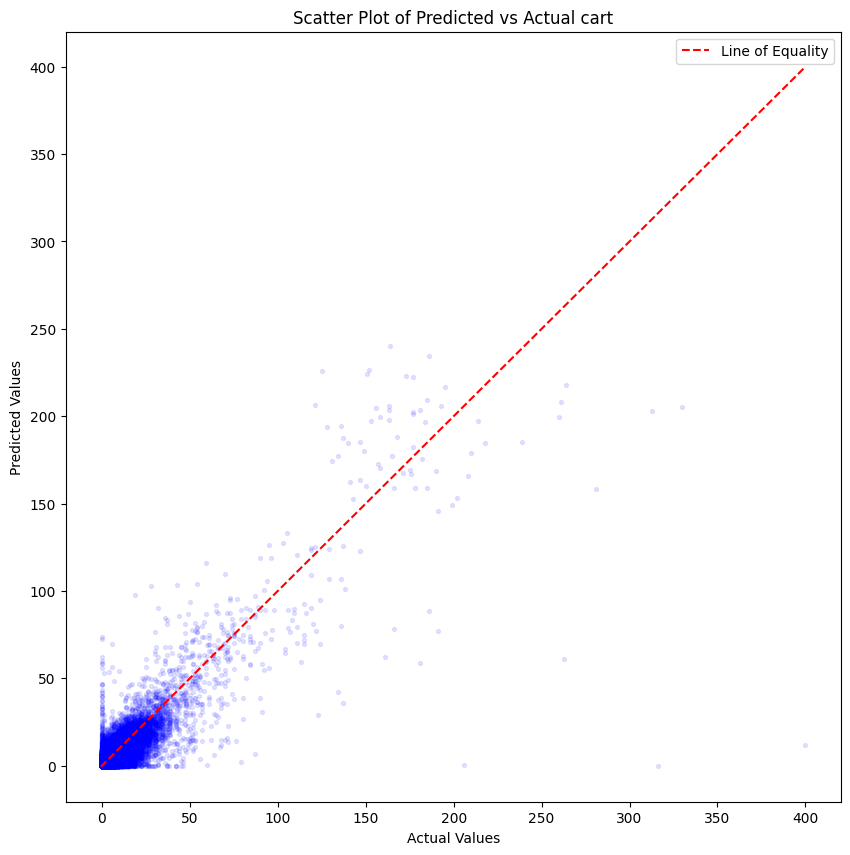

In [5]:
# test predict cart
model_cart: Model = load_model('../model/c-cart.keras')
p_cart = model_cart.predict([X1_test, X2_test])
p_cart = minmax_descale(p_cart[:, 0], 'cart')
plot_accuracy(p_cart, df_test['cart'], "cart")

8461/8461 [==============================] - 10s 1ms/step


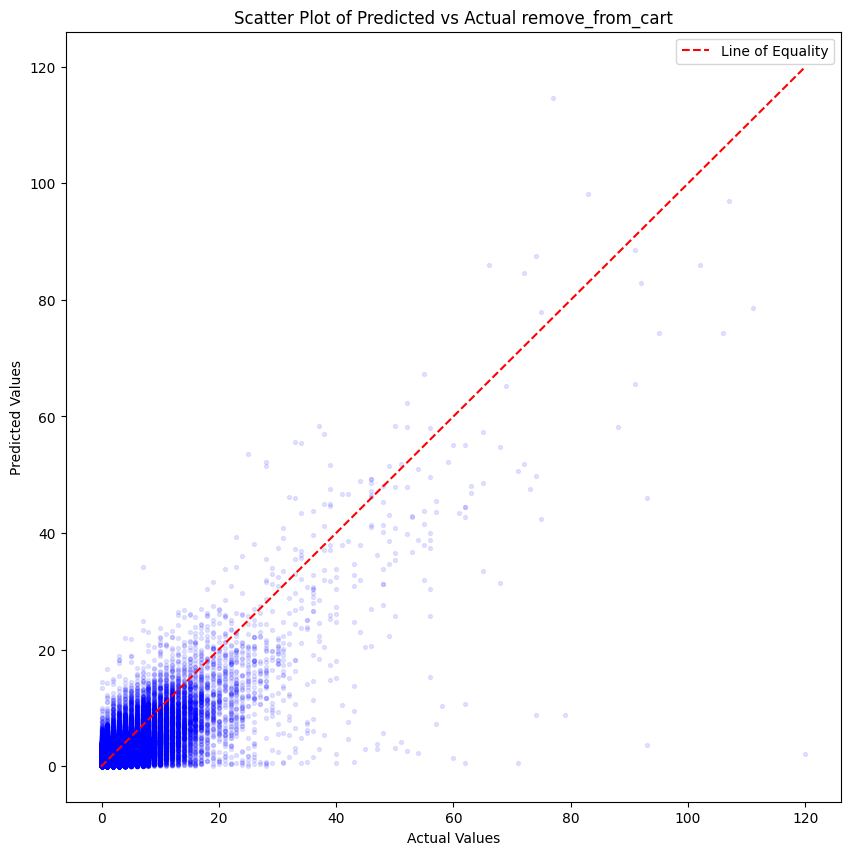

In [6]:
# test predict remove_from_cart
model_remove_from_cart: Model = load_model('../model/c-remove_from_cart.keras')
p_remove_from_cart = model_remove_from_cart.predict([X1_test, X2_test])
p_remove_from_cart = minmax_descale(p_remove_from_cart[:, 0], 'remove_from_cart')
plot_accuracy(p_remove_from_cart, df_test['remove_from_cart'], "remove_from_cart")

8461/8461 [==============================] - 10s 1ms/step


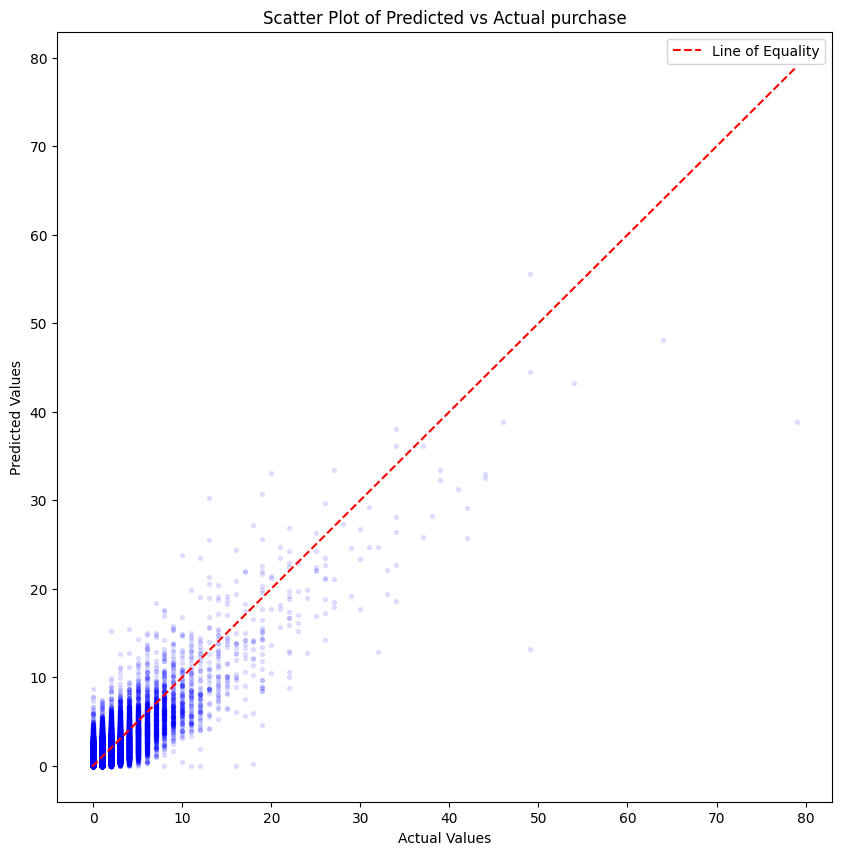

In [7]:
# test predict purchase
model_purchase: Model = load_model('../model/c-purchase.keras')
p_purchase = model_purchase.predict([X1_test, X2_test])
p_purchase = minmax_descale(p_purchase[:, 0], 'purchase')
plot_accuracy(p_purchase, df_test['purchase'], "purchase")

In [8]:
# concatenate and save to CSV
df = pd.DataFrame({ 
    'predicted_view': p_view,
    'actual_view': df_test['view'],
    'predicted_cart': p_cart,
    'actual_cart': df_test['cart'],
    'predicted_remove_from_cart': p_remove_from_cart,
    'actual_remove_from_cart': df_test['remove_from_cart'],
    'predicted_purchase': p_purchase,
    'actual_purchase': df_test['purchase'],
})
df.to_csv('../.data/test/c-test.csv')